<a href="https://colab.research.google.com/github/RafaelHPS/QuarentenaDados01/blob/master/QuarentenaDados_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes


In [0]:
movies = pd.read_csv("https://raw.githubusercontent.com/RafaelHPS/QuarentenaDados01/master/Arquivos_MovieLens/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/RafaelHPS/QuarentenaDados01/master/Arquivos_MovieLens/ratings.csv")

In [0]:
contagem_notas = ratings[['userId']].groupby(ratings['movieId']).count()
contagem_notas.columns = ["countRating"]

In [123]:
contagem_notas.head()

,countRating
movieId,
1,215
2,110
3,52
4,7
5,49


In [0]:
movies_with_count = movies.join(contagem_notas, on="movieId")

In [0]:
valores_nulos = pd.isnull(movies_with_count["countRating"]) 

filmes_sem_voto = movies_with_count[valores_nulos]

In [76]:
quantidade_filmes_sem_voto = filmes_sem_voto["movieId"].count()

print("A quantidade de filmes sem voto é : ",quantidade_filmes_sem_voto)

A quantidade de filmes sem voto é :  18


In [71]:
filmes_sem_voto

,movieId,title,genres,countRating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [77]:
notas_medias_por_filme = ratings.groupby("movieId")["rating"].mean()
notas_medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [79]:
filmes_com_media = movies.join(notas_medias_por_filme, on="movieId")
filmes_com_media.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [82]:
filmes_com_media.columns = ["movieId","title","genres","nota_media"]
filmes_com_media.head()

,movieId,title,genres,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [122]:
movies_with_count.head()

,movieId,title,genres,countRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.


In [0]:
filmes_com_media_arredondada = filmes_com_media.copy(False)
filmes_com_media_arredondada.columns = ["movieId","title","genres","nota_media_arredondada"]

In [0]:
filmes_com_media_arredondada["nota_media_arredondada"] = filmes_com_media_arredondada["nota_media_arredondada"].map('{:,.2f}'.format)


In [125]:
filmes_com_media_arredondada.head()

,movieId,title,genres,nota_media_arredondada
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos = pd.DataFrame(movies["genres"].str.split("|").tolist(),index=movies["movieId"]).stack()
generos = generos.reset_index([0, 'movieId'])
generos.columns = ['movieId', 'genres']
generos_unicos = pd.DataFrame(generos['genres'].unique().tolist())
generos_unicos = generos_unicos.reset_index()
generos_unicos.columns = ["genreId","genre"]

In [152]:
generos_unicos

,genreId,genre
0,0,Adventure
1,1,Animation
2,2,Children
3,3,Comedy
4,4,Fantasy
5,5,Romance
6,6,Drama
7,7,Action
8,8,Crime
9,9,Thriller


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
contagem_generos = generos[['movieId']].groupby(generos['genres']).count()
contagem_generos.columns = ["countGenres"]
contagem_generos = contagem_generos.reset_index([0, 'genres'])
contagem_generos.columns = ['genres', 'countGenres']

In [169]:
contagem_generos.sort_values("countGenres",ascending=False)

,genres,countGenres
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596
2,Adventure,1263
6,Crime,1199
16,Sci-Fi,980
11,Horror,978
9,Fantasy,779


## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

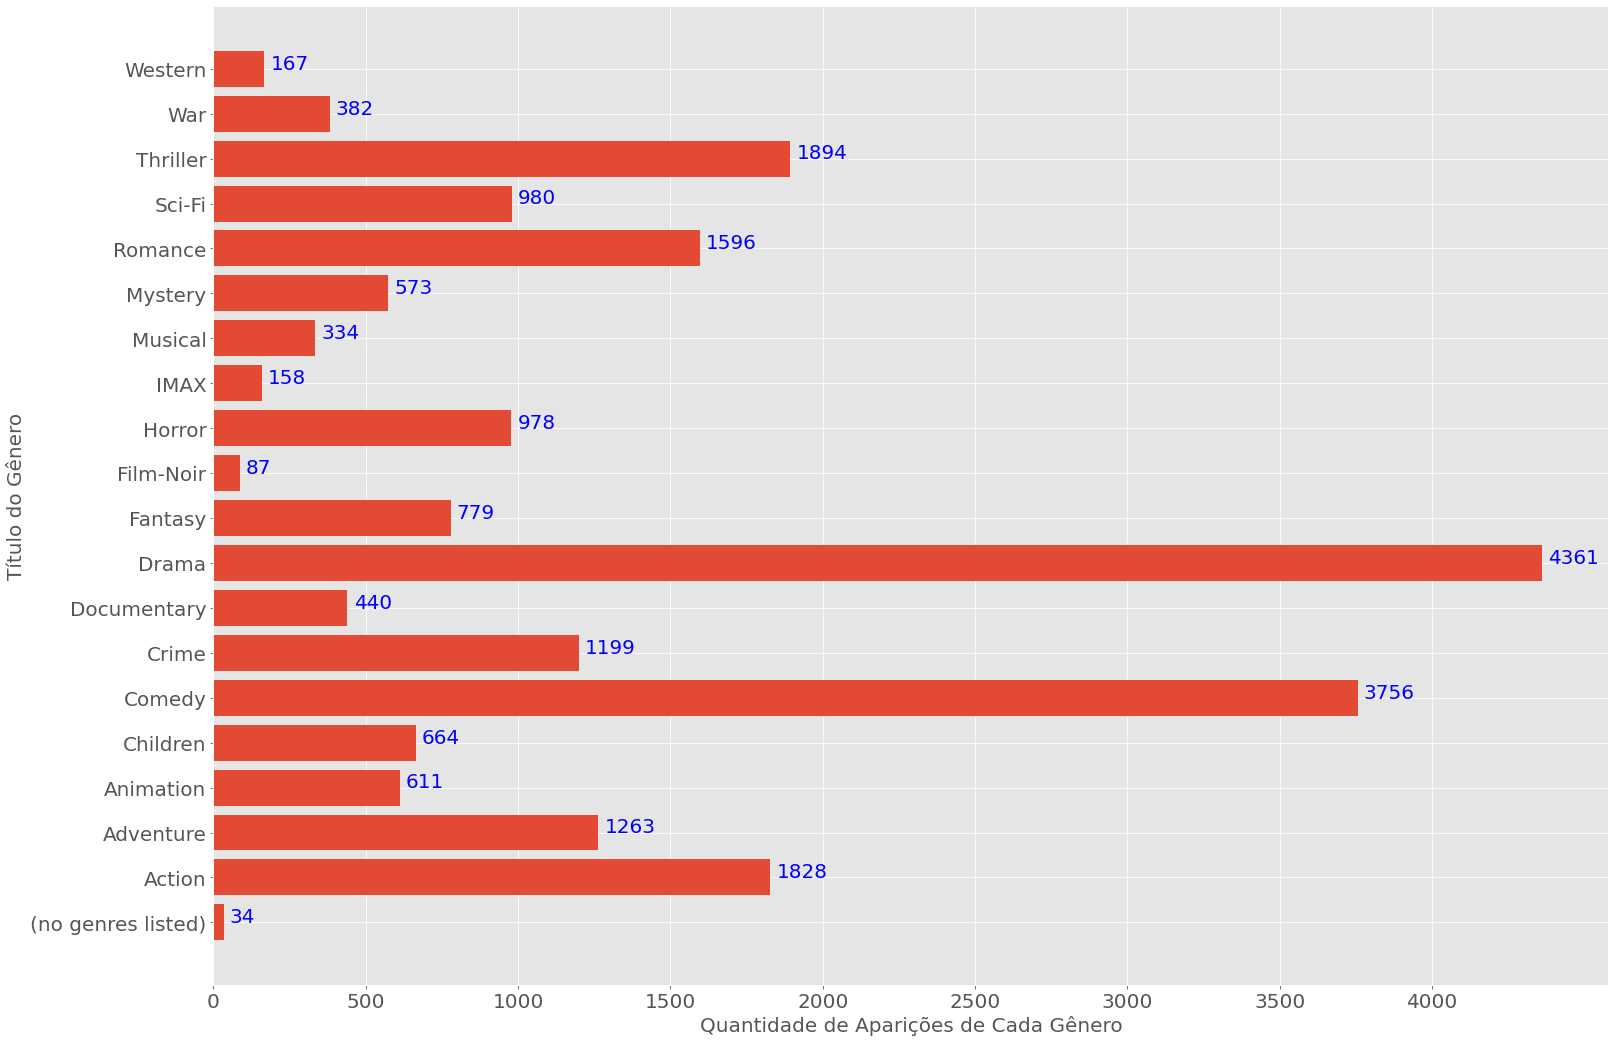

In [257]:
plt.rcParams['figure.figsize'] = (25,18)

y_pos = np.arange(len(contagem_generos["countGenres"]))

x_pos = np.arange(max(contagem_generos["countGenres"]),step=500)

plt.barh(y_pos, contagem_generos["countGenres"])

plt.yticks(y_pos, contagem_generos["genres"],fontsize=20)
plt.xticks(x_pos,fontsize=20)
# naming the x-axis 
plt.xlabel('Quantidade de Aparições de Cada Gênero', fontsize=20) 
# naming the y-axis 
plt.ylabel('Título do Gênero',fontsize=20) 
# plot title 

for i, v in enumerate(contagem_generos["countGenres"]):
  plt.text(v + 20, i + .0, str(v), color='blue', fontsize=20)




plt.show() 